<a href="https://colab.research.google.com/github/jiangenhe/insc-486-fall-2021/blob/main/week14/Decision_Tree_and_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)



In [ ]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

print(cancer.feature_names)
print(clf.feature_importances_)

Breast cancer dataset: decision tree
Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.94
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[0.         0.         0.         0.         0.         0.
 0.         0.78414739 0.         0.         0.         0.
 0.         0.01120443 0.         0.         0.         0.
 0.         0.         0.         0.07083315 0.         0.12748805
 0.00632698 0.         0.         0.         0.         0.        ]


## Cross Validatation

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
import numpy as np
param_range = np.logspace(-3, 3, 4)

train_scores, test_scores = validation_curve(SVC(), X_cancer, y_cancer,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

In [ ]:
print(train_scores)

[[0.9762533  0.97361478 0.98421053]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]]


In [ ]:
print(test_scores)

[[0.91578947 0.93684211 0.91005291]
 [0.62631579 0.62631579 0.62962963]
 [0.62631579 0.62631579 0.62962963]
 [0.62631579 0.62631579 0.62962963]]


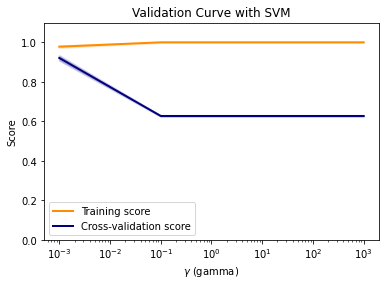

In [ ]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
import matplotlib.pyplot as plt

plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()